In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline
import pandas as pd
import openpyxl

In [3]:
df = pd.read_excel('C:/Users/lakec/Documents/ML/coviddataML1.xlsx', usecols=['date']) # Import columns by name
df_1=pd.read_excel('C:/Users/lakec/Documents/ML/coviddataML1.xlsx', usecols=['avg.deaths'])

In [4]:
X_train=df.to_numpy()
Y_train=df_1.to_numpy()
print (X_train)
print (Y_train)
print (Y_train.shape)
date=X_train[:, 0]

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]
[[ 7.6]
 [ 7.6]
 [ 7.8]
 [ 7.8]
 [ 8. ]
 [ 8. ]
 [ 8.3]
 [ 8.7]
 [ 9.4]
 [ 9.2]
 [ 9.8]
 [ 9.7]
 [10.3]
 [11.5]
 [12. ]
 [12.2]
 [13.5]
 [14.2]
 [14.7]
 [15. ]
 [15.1]
 [15.9]
 [15.8]
 [15.8]
 [15.2]
 [14.7]
 [15.2]
 [13.5]
 [12.4]
 [12.3]
 [12. ]]
(31, 1)


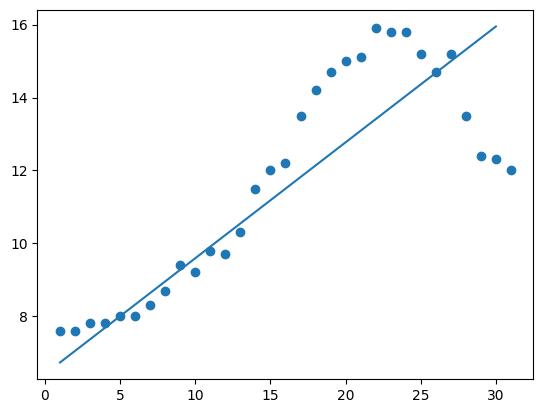

In [597]:
plt.scatter(X_train, Y_train)
x= np.arange(1, 31)
y= 0.318*x+6.41
plt.plot(x, y)

In [572]:
def compute_cost(X_train, Y_train, w, b, _lambda):
    m  = X_train.shape[0]
    n  = len(w)
    cost = 0.
    _lambda=2
    for i in range(m):
        f_wb_i = X_train[i]*w+ b                                 
        cost+= (f_wb_i - Y_train[i])**2                                        
    cost = np.sum(cost) / (2 * m)                                           
    reg_cost=0
    reg_cost+= (w**2)                                        
    reg_cost = (_lambda/(2*m)) * reg_cost                             
    
    total_cost = cost + reg_cost
    return (np.sum(total_cost))                                           

In [573]:
initial_w= np.array([0.5])
initial_b= 7.5

compute_cost(X_train, Y_train, initial_w, initial_b, _lambda)

np.float64(10.480483870967742)

In [581]:
def compute_gradient(X_train, Y_train, w, b, _lambda):
    m,n = X_train.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    err=0
    for i in range(m):                             
        f_wb_i = X_train[i]*w + b
        err+= dj_dw+ f_wb_i - Y_train[i]                                     
        dj_dw+= (f_wb_i-Y_train[i])* X_train[i]         
        dj_db= err                       
    dj_dw = (dj_dw)+_lambda*w/ m                                
    dj_db = dj_db / m 

    return dj_db, dj_dw

In [582]:
w_init = np.array([ 0.1])
w_init = w_init.T
print (w_init)
b_init=7

[0.1]


In [583]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, Y_train, w_init, b_init, _lambda)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-559.00645161]
dj_dw at initial w,b: 
 [-1975.46774194]


In [588]:
def gradient_descent(X_train, Y_train, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
     # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X_train, Y_train, w, b, _lambda)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X_train, Y_train, w, b, _lambda))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing


In [596]:
# initialize parameters
initial_w = np.array([0.1])
initial_b = np.array([6])
# some gradient descent settings
iterations = 100000
alpha = .00000003
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, Y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")

Iteration    0: Cost    10.93   
Iteration 10000: Cost     1.46   
Iteration 20000: Cost     1.44   
Iteration 30000: Cost     1.43   
Iteration 40000: Cost     1.42   
Iteration 50000: Cost     1.41   
Iteration 60000: Cost     1.40   
Iteration 70000: Cost     1.39   
Iteration 80000: Cost     1.38   
Iteration 90000: Cost     1.37   
b,w found by gradient descent: [6.4062014],[0.31842859] 
